In [392]:
from util import *

In [63]:
%matplotlib inline
import pandas as pd
import geopandas as gpd
import numpy as np
import time

import libpysal
import pysal as ps

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import os
os.chdir('C:\\Users\\renan\\Desktop\\inequality\\inequality')

from dissimilarity import Dissim
from spatial_dissimilarity import Spatial_Dissim
from entropy import Entropy
from perimeter_area_ratio_spatial_dissimilarity import Perimeter_Area_Ratio_Spatial_Dissim
from absolute_centralization import Absolute_Centralization
from absolute_concentration import Absolute_Concentration
from atkinson import Atkinson
from bias_corrected_dissimilarity import Bias_Corrected_Dissim
from boundary_spatial_dissimilarity import Boundary_Spatial_Dissim
from conprof import Con_Prof
from correlationr import Correlation_R
from delta import Delta
from density_corrected_dissimilarity import Density_Corrected_Dissim
from exposure import Exposure
from gini_seg import Gini_Seg
from isolation import Isolation
from modified_dissimilarity import Modified_Dissim
from modified_gini_seg import Modified_Gini_Seg
from relative_centralization import Relative_Centralization
from relative_clustering import Relative_Clustering
from relative_concentration import Relative_Concentration
from spatial_exposure import Spatial_Exposure
from spatial_isolation import Spatial_Isolation
from spatial_prox_profile import Spatial_Prox_Prof
from infer_segregation import Infer_Segregation
from compare_segregation import Compare_Segregation
from spatial_proximity import Spatial_Proximity

In [64]:
# Function that perform simulation study:
def segregation_comparison_profile(gdf_1, gdf_2, iterations, null_approach):
    D_1 = Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    G_1 = Gini_Seg(gdf_1, 'group_pop_var', 'total_pop_var')
    H_1 = Entropy(gdf_1, 'group_pop_var', 'total_pop_var')
    A_1 = Atkinson(gdf_1, 'group_pop_var', 'total_pop_var')
    xPy_1 = Exposure(gdf_1, 'group_pop_var', 'total_pop_var')
    xPx_1 = Isolation(gdf_1, 'group_pop_var', 'total_pop_var')
    R_1 = Con_Prof(gdf_1, 'group_pop_var', 'total_pop_var')
    Dbc_1 = Bias_Corrected_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    Ddc_1 = Density_Corrected_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    V_1 = Correlation_R(gdf_1, 'group_pop_var', 'total_pop_var')
    Dct_1 = Modified_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    Gct_1 = Modified_Gini_Seg(gdf_1, 'group_pop_var', 'total_pop_var')
    SD_1 = Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    PARD_1 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    BSD_1 = Boundary_Spatial_Dissim(gdf_1, 'group_pop_var', 'total_pop_var')
    ACE_1 = Absolute_Centralization(gdf_1, 'group_pop_var', 'total_pop_var')
    ACO_1 = Absolute_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    DEL_1 = Delta(gdf_1, 'group_pop_var', 'total_pop_var')
    RCE_1 = Relative_Centralization(gdf_1, 'group_pop_var', 'total_pop_var')
    RCL_1 = Relative_Clustering(gdf_1, 'group_pop_var', 'total_pop_var')
    RCO_1 = Relative_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    SxPy_1 = Spatial_Exposure(gdf_1, 'group_pop_var', 'total_pop_var')
    SxPx_1 = Spatial_Isolation(gdf_1, 'group_pop_var', 'total_pop_var')
    SPP_1 = Spatial_Prox_Prof(gdf_1, 'group_pop_var', 'total_pop_var')
    SP_1 = Spatial_Proximity(gdf_1, 'group_pop_var', 'total_pop_var')
    
    D_2 = Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    G_2 = Gini_Seg(gdf_2, 'group_pop_var', 'total_pop_var')
    H_2 = Entropy(gdf_2, 'group_pop_var', 'total_pop_var')
    A_2 = Atkinson(gdf_2, 'group_pop_var', 'total_pop_var')
    xPy_2 = Exposure(gdf_2, 'group_pop_var', 'total_pop_var')
    xPx_2 = Isolation(gdf_2, 'group_pop_var', 'total_pop_var')
    R_2 = Con_Prof(gdf_2, 'group_pop_var', 'total_pop_var')
    Dbc_2 = Bias_Corrected_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    Ddc_2 = Density_Corrected_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    V_2 = Correlation_R(gdf_2, 'group_pop_var', 'total_pop_var')
    Dct_2 = Modified_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    Gct_2 = Modified_Gini_Seg(gdf_2, 'group_pop_var', 'total_pop_var')
    SD_2 = Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    PARD_2 = Perimeter_Area_Ratio_Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    BSD_2 = Boundary_Spatial_Dissim(gdf_2, 'group_pop_var', 'total_pop_var')
    ACE_2 = Absolute_Centralization(gdf_2, 'group_pop_var', 'total_pop_var')
    ACO_2 = Absolute_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    DEL_2 = Delta(gdf_2, 'group_pop_var', 'total_pop_var')
    RCE_2 = Relative_Centralization(gdf_2, 'group_pop_var', 'total_pop_var')
    RCL_2 = Relative_Clustering(gdf_2, 'group_pop_var', 'total_pop_var')
    RCO_2 = Relative_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    SxPy_2 = Spatial_Exposure(gdf_2, 'group_pop_var', 'total_pop_var')
    SxPx_2 = Spatial_Isolation(gdf_2, 'group_pop_var', 'total_pop_var')
    SPP_2 = Spatial_Prox_Prof(gdf_2, 'group_pop_var', 'total_pop_var')
    SP_2 = Spatial_Proximity(gdf_2, 'group_pop_var', 'total_pop_var')
    
    all_measures_1 = (D_1, G_1, H_1, xPx_1, xPy_1, A_1, V_1, R_1, Dct_1, Gct_1, Dbc_1, Ddc_1, SPP_1, SD_1, BSD_1, PARD_1, SxPx_1, SxPy_1, SP_1, RCL_1, DEL_1, ACO_1, RCO_1, ACE_1, RCE_1)
    all_measures_2 = (D_2, G_2, H_2, xPx_2, xPy_2, A_2, V_2, R_2, Dct_2, Gct_2, Dbc_2, Ddc_2, SPP_2, SD_2, BSD_2, PARD_2, SxPx_2, SxPy_2, SP_2, RCL_2, DEL_2, ACO_2, RCO_2, ACE_2, RCE_2)
    
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

    t0 = time.time()

    res_simul = ()

    for i in range(1, len(all_measures_1)+1):

        t0_i = time.time()
        aux = Compare_Segregation(all_measures_1[i-1], 
                                  all_measures_2[i-1], 
                                  null_approach = null_approach, 
                                  iterations = iterations)
        t1_i = time.time()
        print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
        res_simul += (aux, )

        ax = fig.add_subplot(5, 5, i)
        sns.distplot(aux.est_sim, 
                     color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 2})
        plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
        plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)

    t1 = time.time()

    total = t1 - t0
    print('Total Time = {}'.format(total))
    
    return res_simul, total

In [65]:
# ?ps.weights.build_lattice_shapefile
ps.weights.build_lattice_shapefile(nrows = 10, ncols = 10, outFileName = 'reg_lat_10_10.shp')
lat_10_10 = gpd.read_file('reg_lat_10_10.shp')
lat_10_10.head()

,ID,geometry
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))"
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))"
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))"
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))"
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))"


In [66]:
ps.weights.build_lattice_shapefile(nrows = 12, ncols = 12, outFileName = 'reg_lat_12_12.shp')
lat_12_12 = gpd.read_file('reg_lat_12_12.shp')
lat_12_12.head()

,ID,geometry
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))"
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))"
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))"
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))"
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))"


# First Scenario: Increasing Total Population Over the same distribution minority proportions

It's very likely that the ACO and the RCO will not give valid results in this case, because of their conceptions. In the formulas, you order according to the area size which, in this case, is in the middle of the distribution (the median) so relative will result in division by zero.

In [67]:
# Setup
n_1 = 100000 # Total population 1
n_2 = 150000 # Total population 2

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n_1 * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n_2 * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(lat_10_10_1)))
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(lat_10_10_2)))

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,874.268839
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,747.729413
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,647.334693
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,399.146230
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,316.999737


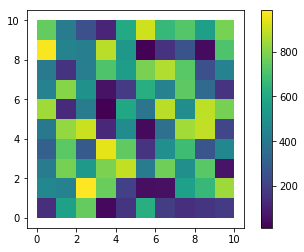

In [6]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

In [7]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1500,216.254569
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1500,697.586080
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1500,627.137374
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1500,459.342922
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1500,611.595634


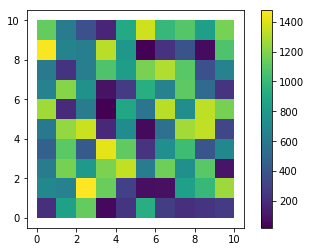

In [8]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.15360188484191895
Gini_Seg Time = 0.15081453323364258
Entropy Time = 0.17455005645751953
Isolation Time = 0.14964938163757324
Exposure Time = 0.1510789394378662
Atkinson Time = 0.16108989715576172
Correlation_R Time = 0.15813875198364258
Con_Prof Time = 8.678588390350342
Modified_Dissim Time = 22.94864058494568
Modified_Gini_Seg Time = 23.87761878967285
Bias_Corrected_Dissim Time = 23.407796621322632
Density_Corrected_Dissim Time = 27.844557523727417
Spatial_Prox_Prof Time = 4.998670339584351
Spatial_Dissim Time = 0.30309343338012695
Boundary_Spatial_Dissim Time = 1.114020586013794
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.0986716747283936
Spatial_Isolation Time = 0.2769768238067627
Spatial_Exposure Time = 0.2805933952331543
Spatial_Proximity Time = 0.28330397605895996
Relative_Clustering Time = 0.3141312599182129
Delta Time = 0.18264341354370117
Absolute_Concentration Time = 0.3051602840423584
Relative_Concentration Time = 0.2882537841796875
Absolute_Centralization 

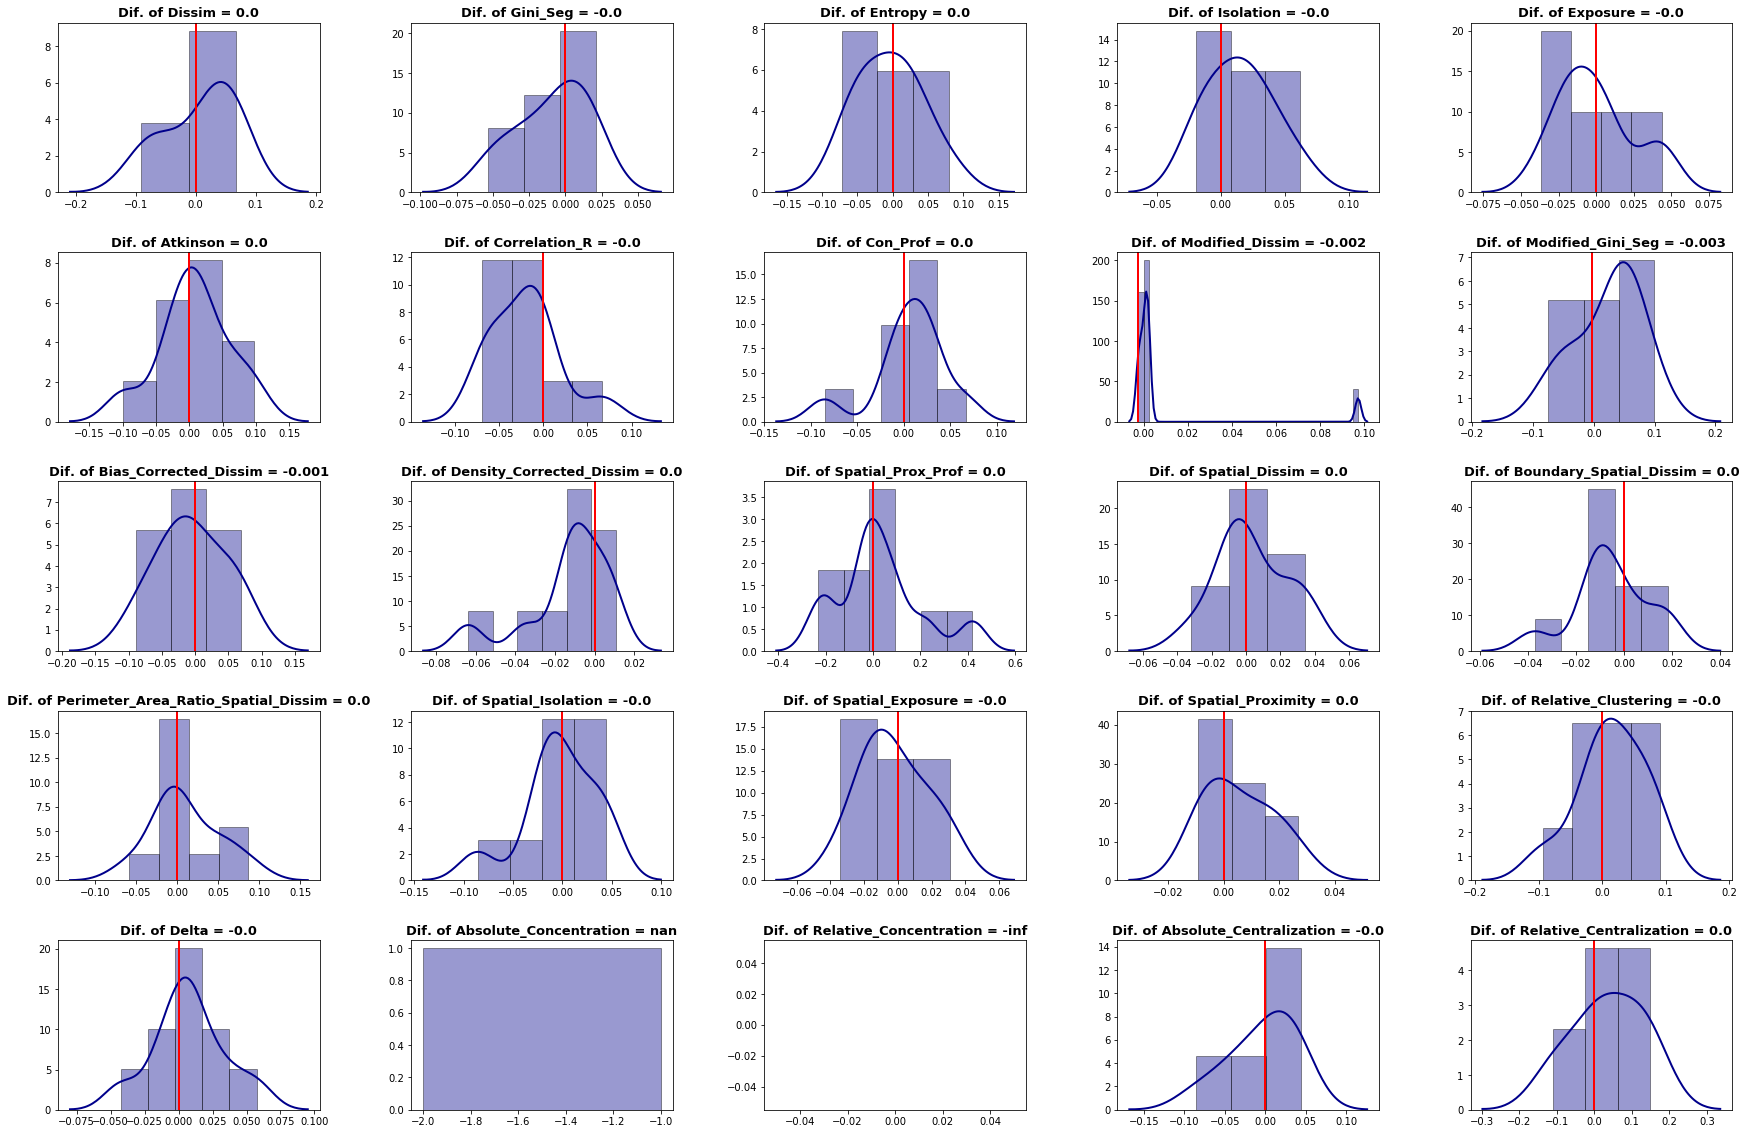

In [9]:
res1 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "random_data")
# [res1[0][i].est_sim for i in range(0, 25)]

Dissim Time = 0.20245838165283203
Gini_Seg Time = 0.16758298873901367
Entropy Time = 0.1815662384033203
Isolation Time = 0.1625974178314209
Exposure Time = 0.16954660415649414
Atkinson Time = 0.18151497840881348
Correlation_R Time = 0.16655182838439941
Con_Prof Time = 8.311737537384033
Modified_Dissim Time = 24.886436700820923
Modified_Gini_Seg Time = 25.152758598327637
Bias_Corrected_Dissim Time = 22.41109824180603
Density_Corrected_Dissim Time = 26.979870319366455
Spatial_Prox_Prof Time = 5.021599054336548
Spatial_Dissim Time = 0.3091707229614258
Boundary_Spatial_Dissim Time = 1.1150171756744385
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.0931127071380615
Spatial_Isolation Time = 0.2832756042480469
Spatial_Exposure Time = 0.3002011775970459
Spatial_Proximity Time = 0.2922182083129883
Relative_Clustering Time = 0.27430105209350586
Delta Time = 0.18553948402404785
Absolute_Concentration Time = 0.27829432487487793
Relative_Concentration Time = 0.29421186447143555
Absolute_Centralizatio

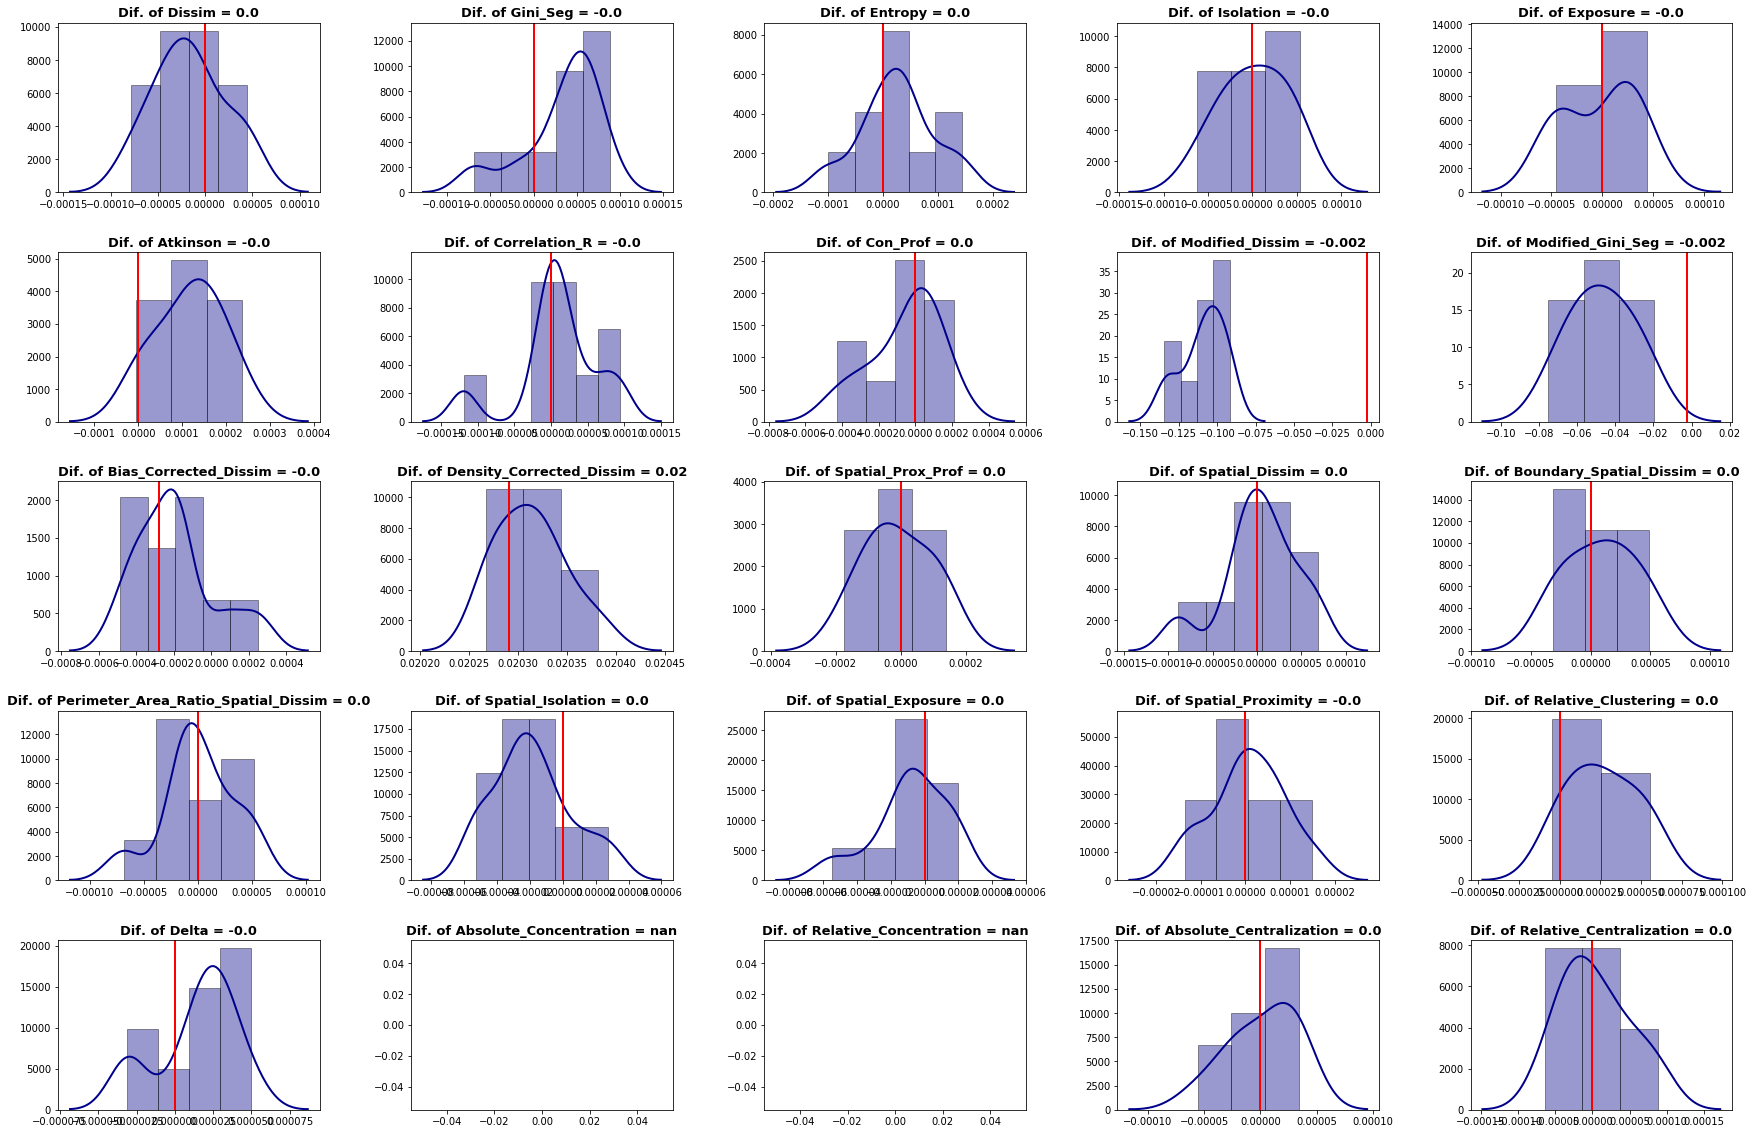

In [93]:
res2 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "pseudo_cumulative")
# [res2[0][i].est_sim for i in range(0, 25)]

# Second Scenario: City Increased of size (spread but kept the same global population) but the overall structure remained the same with roughly eveness

In order to make a fair comparison, it's needed to remain the same structure. In this case, the units have roughly the same global minority. 

In [96]:
# Setup
n = 100000 # Total population

p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

lat_10_10 = lat_10_10.copy()
lat_12_12 = lat_12_12.copy()

lat_10_10['total_pop_var'] = int(n * 1/len(lat_10_10))
lat_12_12['total_pop_var'] = int(n * 1/len(lat_12_12))

lat_10_10['group_pop_var'] = lat_10_10['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(lat_10_10)))
lat_12_12['group_pop_var'] = lat_12_12['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(lat_12_12)))

lat_10_10.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,300.491969
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,298.739194
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,301.185516
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,300.115106
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,299.979995


In [97]:
lat_12_12.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",694,208.815431
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",694,207.262034
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",694,208.578263
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",694,207.528542
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",694,209.306779


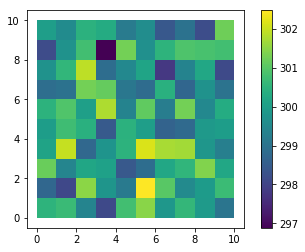

In [100]:
lat_10_10.plot(column = 'group_pop_var', legend = True)

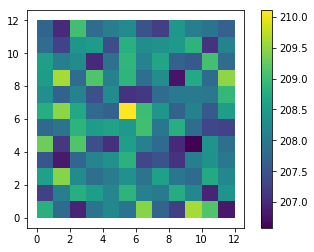

In [101]:
lat_12_12.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.19150805473327637
Gini_Seg Time = 0.16954684257507324
Entropy Time = 0.18553757667541504
Isolation Time = 0.1625962257385254
Exposure Time = 0.17658042907714844
Atkinson Time = 0.17456436157226562
Correlation_R Time = 0.17256784439086914
Con_Prof Time = 8.783469915390015
Modified_Dissim Time = 23.0084547996521
Modified_Gini_Seg Time = 23.86217498779297
Bias_Corrected_Dissim Time = 22.43898320198059
Density_Corrected_Dissim Time = 28.150704860687256
Spatial_Prox_Prof Time = 4.976683139801025
Spatial_Dissim Time = 0.3311488628387451
Boundary_Spatial_Dissim Time = 1.2427072525024414
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.2706327438354492
Spatial_Isolation Time = 0.2972371578216553
Spatial_Exposure Time = 0.3151571750640869
Spatial_Proximity Time = 0.31218600273132324
Relative_Clustering Time = 0.30915403366088867
Delta Time = 0.21339774131774902
Absolute_Concentration Time = 0.2902235984802246
Relative_Concentration Time = 0.281280517578125
Absolute_Centralization Ti

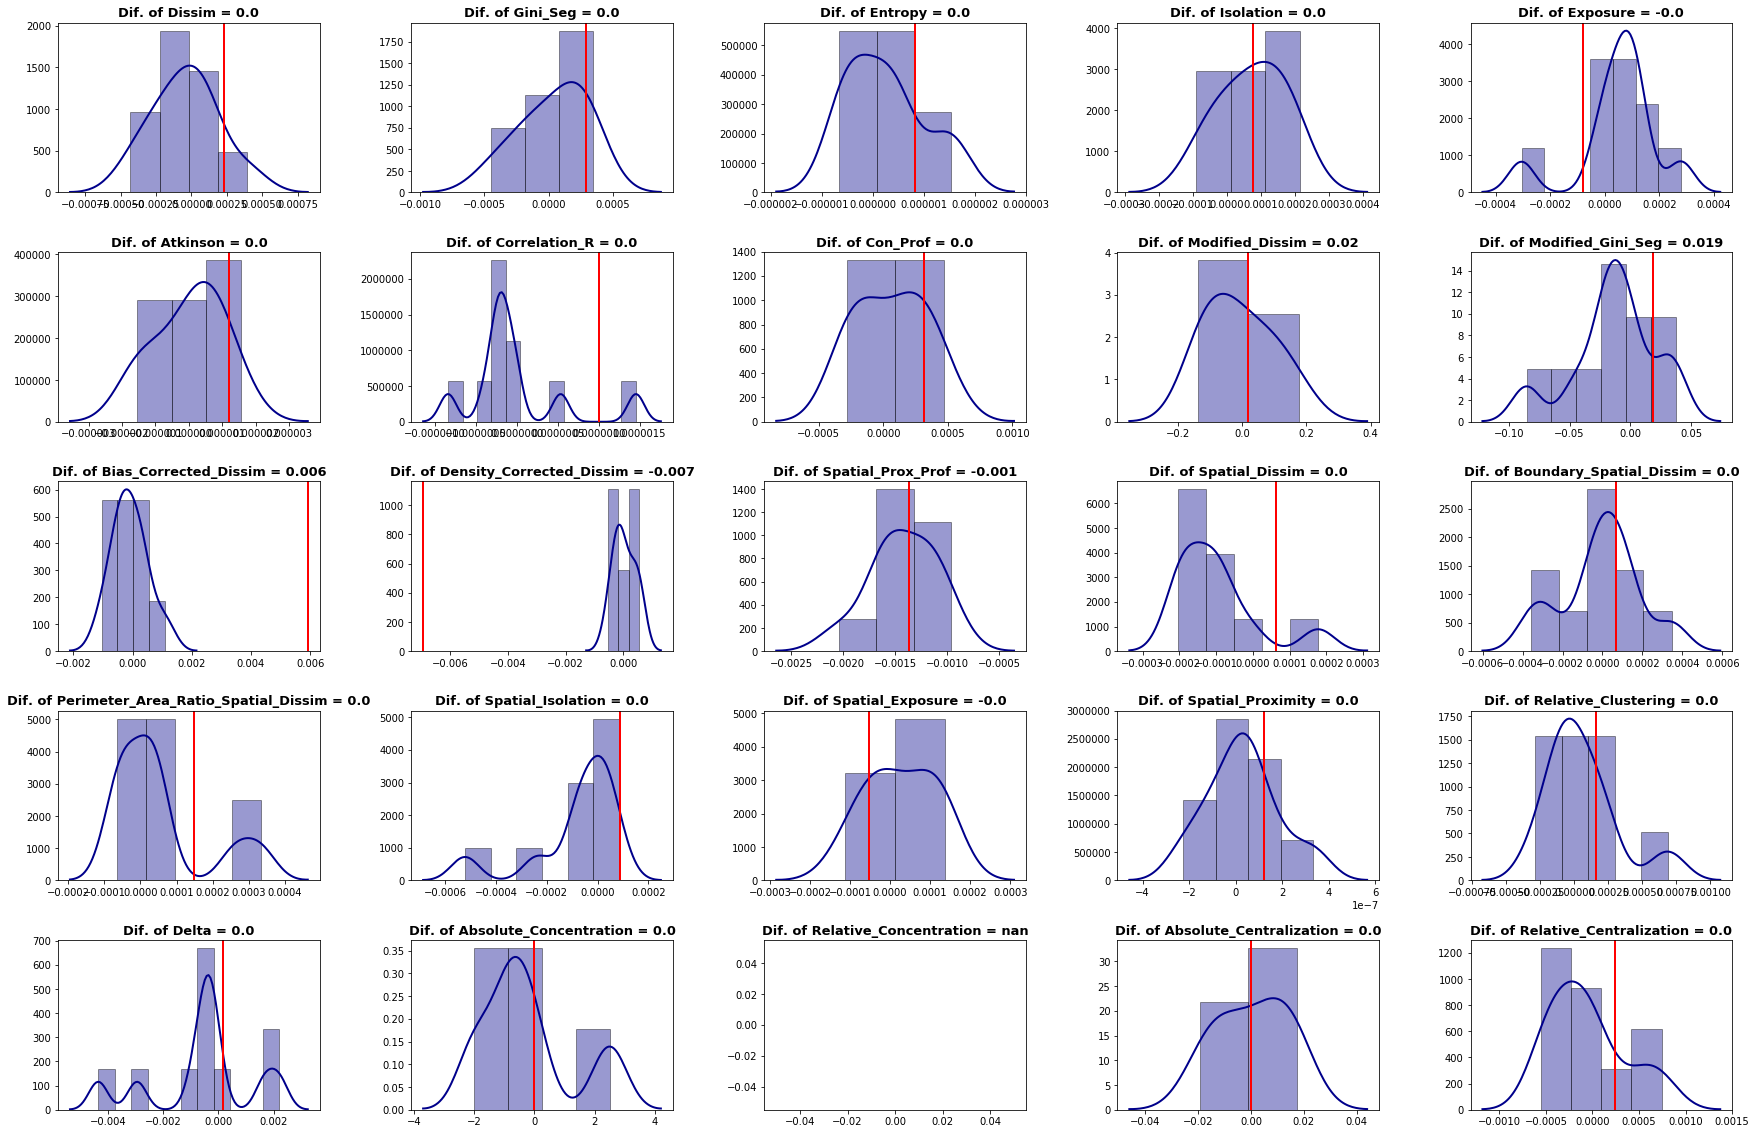

In [102]:
res3 = segregation_comparison_profile(lat_10_10, lat_12_12, iterations = 10, null_approach = "random_data")
# [res3[0][i].est_sim for i in range(0, 25)]

Dissim Time = 0.18450617790222168
Gini_Seg Time = 0.16256499290466309
Entropy Time = 0.17953896522521973
Isolation Time = 0.16260147094726562
Exposure Time = 0.17054438591003418
Atkinson Time = 0.17157220840454102
Correlation_R Time = 0.1735377311706543
Con_Prof Time = 8.333739280700684
Modified_Dissim Time = 25.3352370262146
Modified_Gini_Seg Time = 25.267417192459106
Bias_Corrected_Dissim Time = 22.109864711761475
Density_Corrected_Dissim Time = 27.946218729019165
Spatial_Prox_Prof Time = 5.052483081817627
Spatial_Dissim Time = 0.330150842666626
Boundary_Spatial_Dissim Time = 1.2267513275146484
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.264615774154663
Spatial_Isolation Time = 0.2932126522064209
Spatial_Exposure Time = 0.297238826751709
Spatial_Proximity Time = 0.3011970520019531
Relative_Clustering Time = 0.29920029640197754
Delta Time = 0.18354487419128418
Absolute_Concentration Time = 0.2892630100250244
Relative_Concentration Time = 0.29823756217956543
Absolute_Centralization Ti

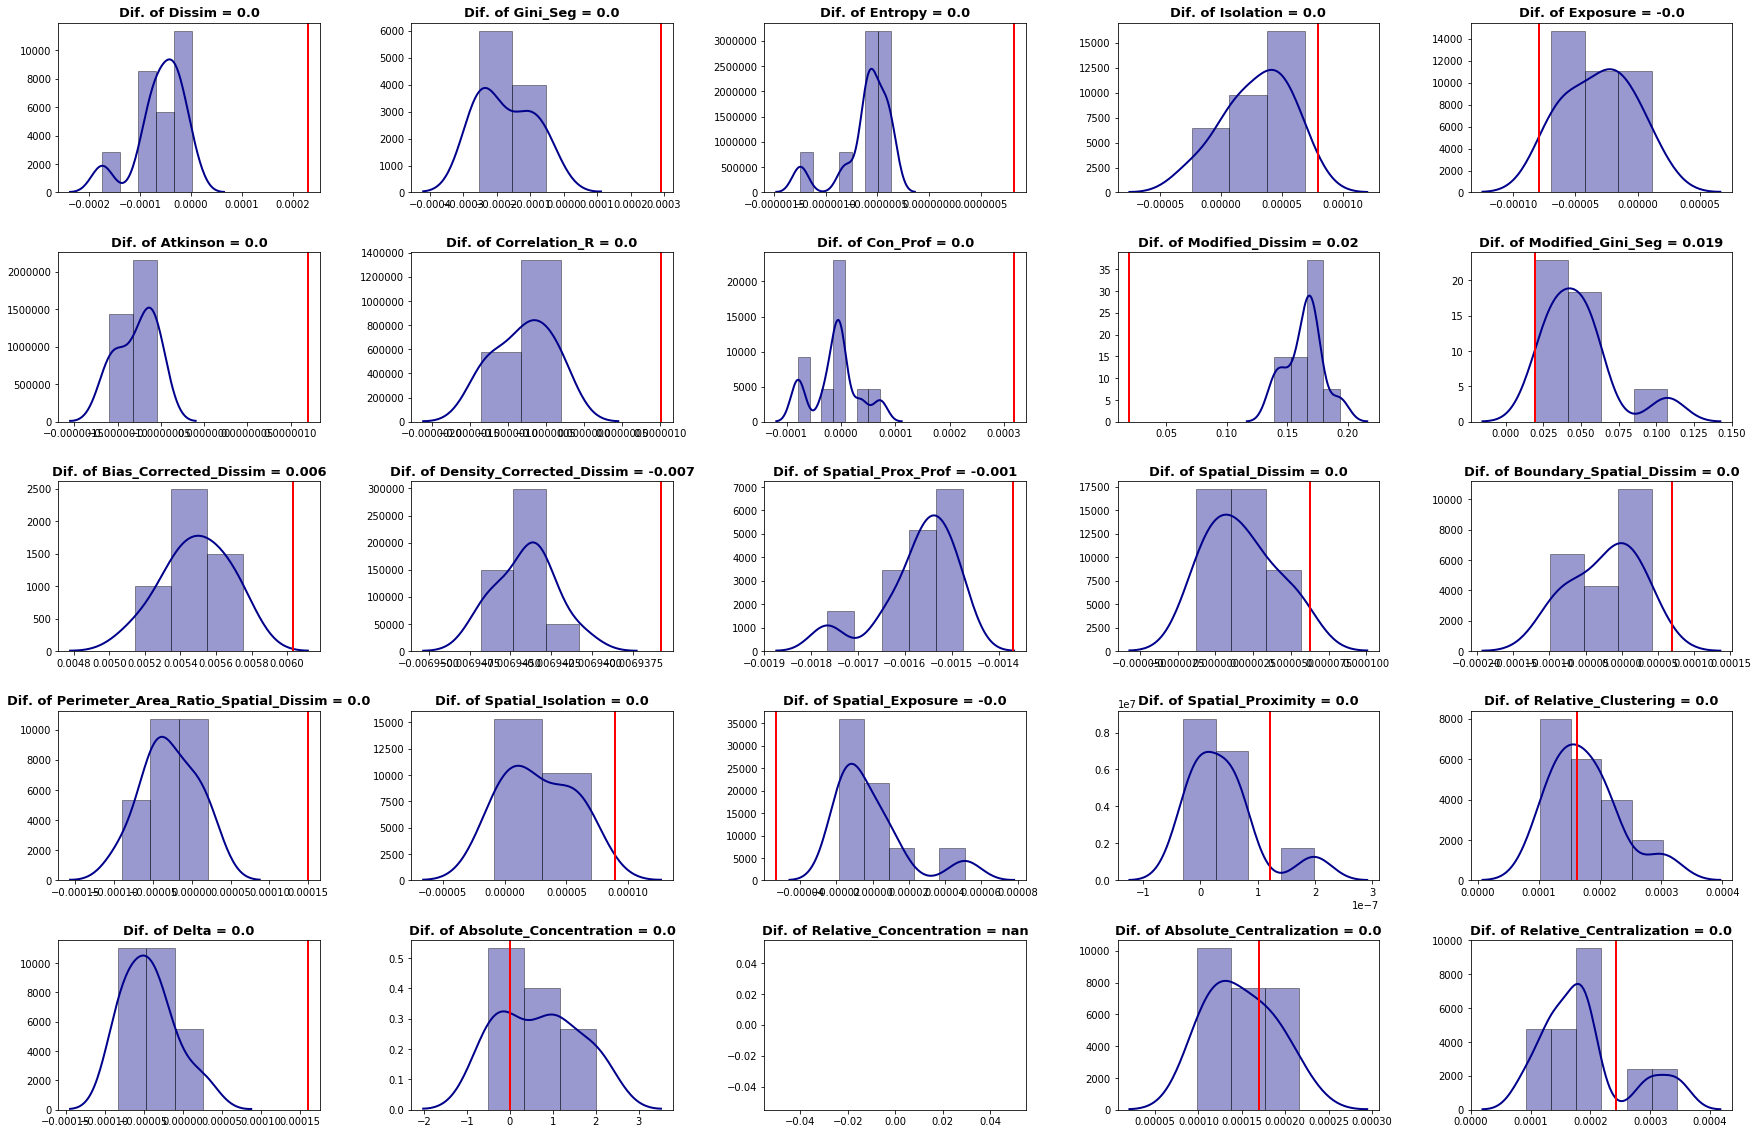

In [104]:
res4 = segregation_comparison_profile(lat_10_10, lat_12_12, iterations = 10, null_approach = "pseudo_cumulative")
# [res4[0][i].est_sim for i in range(0, 25)]

# Third scenario: the unit composition changed from lower percentages to higher percentages of the minority group

In [46]:
# Setup
n = 100000 # Total population

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion
p_1 = np.random.beta(a = 2, b = 5, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
#p_2 = np.random.beta(a = 5, b = 2, size = 100)

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * p_1
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * (p_1 + 0.25) # p_2

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,137.145269
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,36.804083
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,355.777900
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,87.131664
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,177.894136


In [47]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,387.145269
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,286.804083
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,605.777900
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,337.131664
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,427.894136


In [48]:
max(p_1/2)

0.19318091042671298

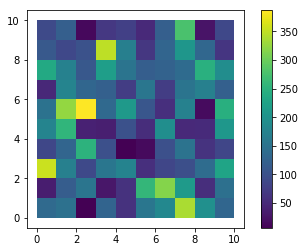

In [49]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

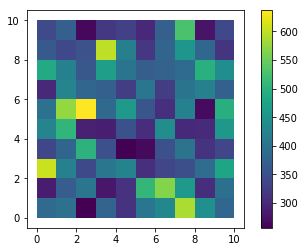

In [50]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

Dissim Time = 0.20305562019348145
Gini_Seg Time = 0.1821293830871582
Entropy Time = 0.17189788818359375
Isolation Time = 0.17945361137390137
Exposure Time = 0.1807727813720703
Atkinson Time = 0.1874377727508545
Correlation_R Time = 0.1573042869567871
Con_Prof Time = 8.988557577133179
Modified_Dissim Time = 22.599679231643677
Modified_Gini_Seg Time = 23.45198941230774
Bias_Corrected_Dissim Time = 22.014134168624878
Density_Corrected_Dissim Time = 26.531638622283936
Spatial_Prox_Prof Time = 4.879298448562622
Spatial_Dissim Time = 0.30545854568481445
Boundary_Spatial_Dissim Time = 1.0509555339813232
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.1328327655792236
Spatial_Isolation Time = 0.30393290519714355
Spatial_Exposure Time = 0.28495025634765625
Spatial_Proximity Time = 0.2999274730682373
Relative_Clustering Time = 0.29187440872192383
Delta Time = 0.17608094215393066
Absolute_Concentration Time = 0.26675844192504883
Relative_Concentration Time = 0.289064884185791
Absolute_Centralization

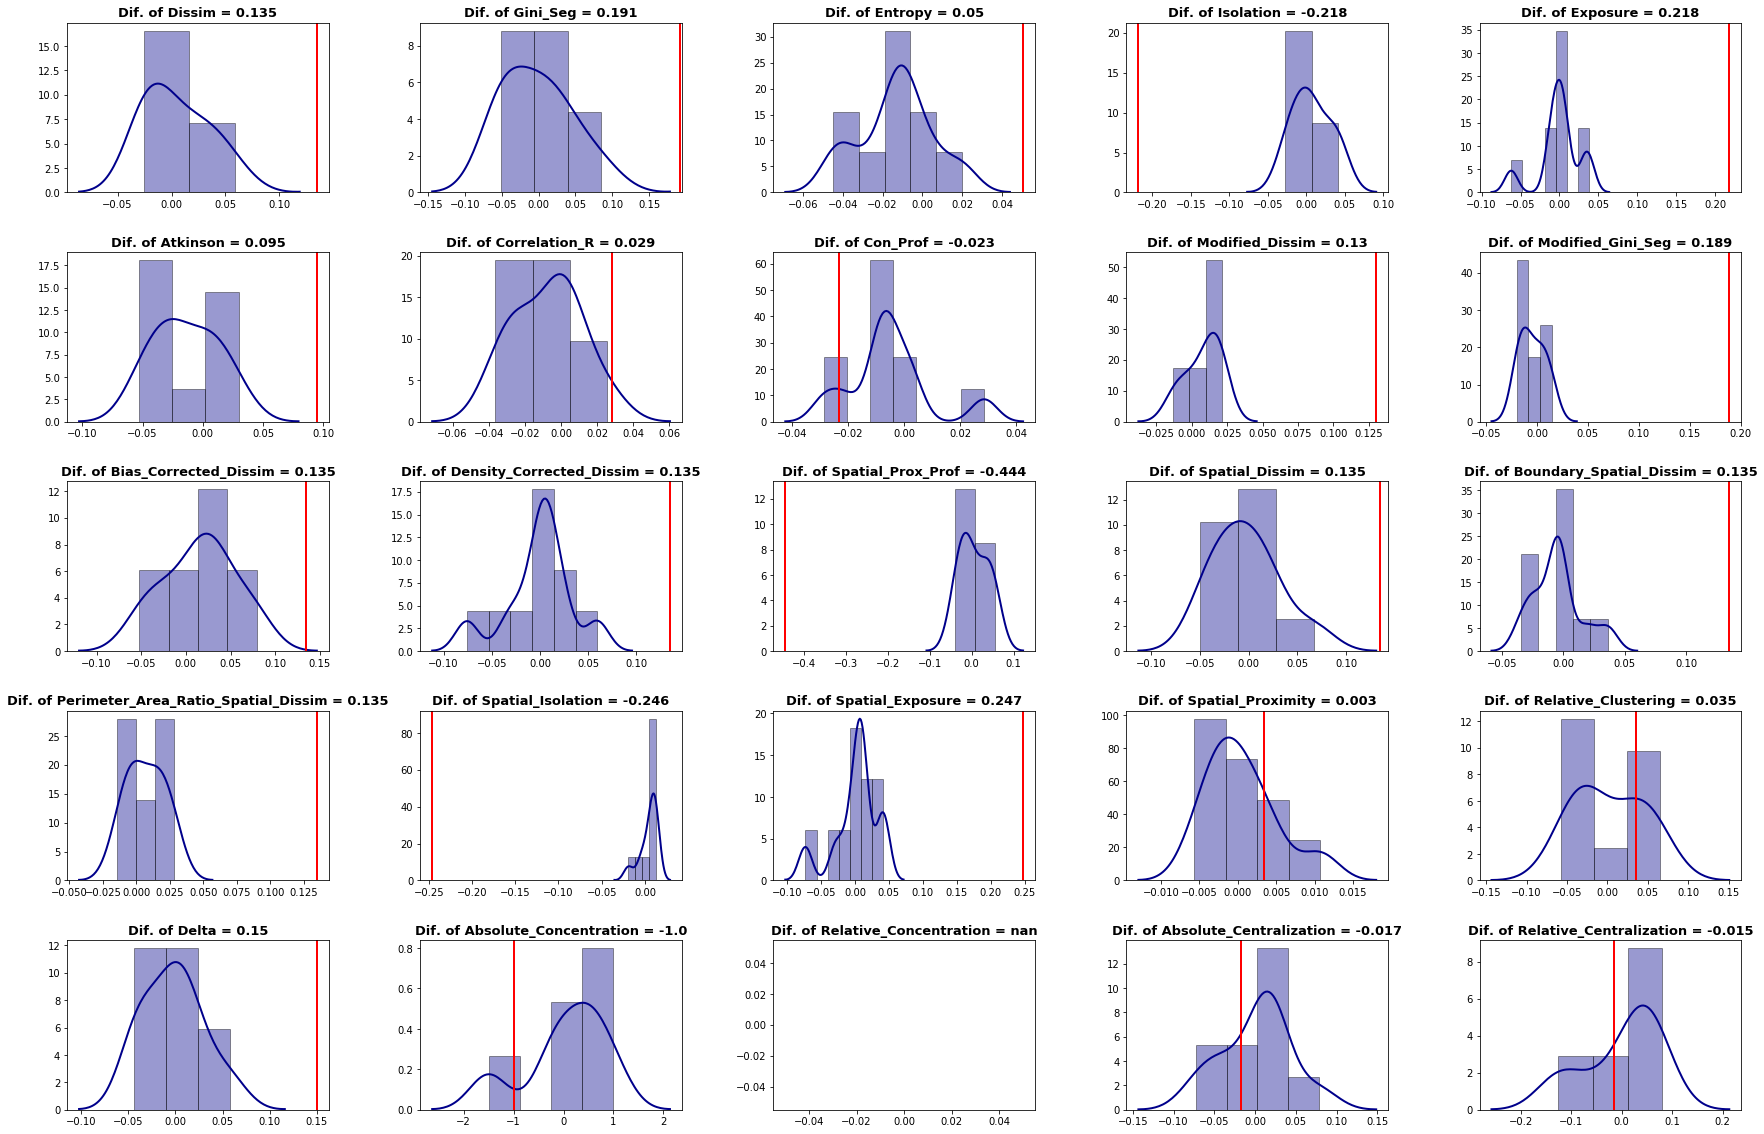

In [51]:
res5 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "random_data")
# [res5[0][i].est_sim for i in range(0, 25)]

Dissim Time = 0.19418835639953613
Gini_Seg Time = 0.17181897163391113
Entropy Time = 0.17970013618469238
Isolation Time = 0.15623116493225098
Exposure Time = 0.17874789237976074
Atkinson Time = 0.18863368034362793
Correlation_R Time = 0.20842957496643066
Con_Prof Time = 8.271458625793457
Modified_Dissim Time = 25.045578002929688
Modified_Gini_Seg Time = 24.978041887283325
Bias_Corrected_Dissim Time = 21.88883352279663
Density_Corrected_Dissim Time = 26.188586473464966
Spatial_Prox_Prof Time = 4.8686230182647705
Spatial_Dissim Time = 0.32042360305786133
Boundary_Spatial_Dissim Time = 1.0474867820739746
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.0719316005706787
Spatial_Isolation Time = 0.2799344062805176
Spatial_Exposure Time = 0.2885274887084961
Spatial_Proximity Time = 0.2981104850769043
Relative_Clustering Time = 0.27114129066467285
Delta Time = 0.191969633102417
Absolute_Concentration Time = 0.26883363723754883
Relative_Concentration Time = 0.2776188850402832
Absolute_Centralizati

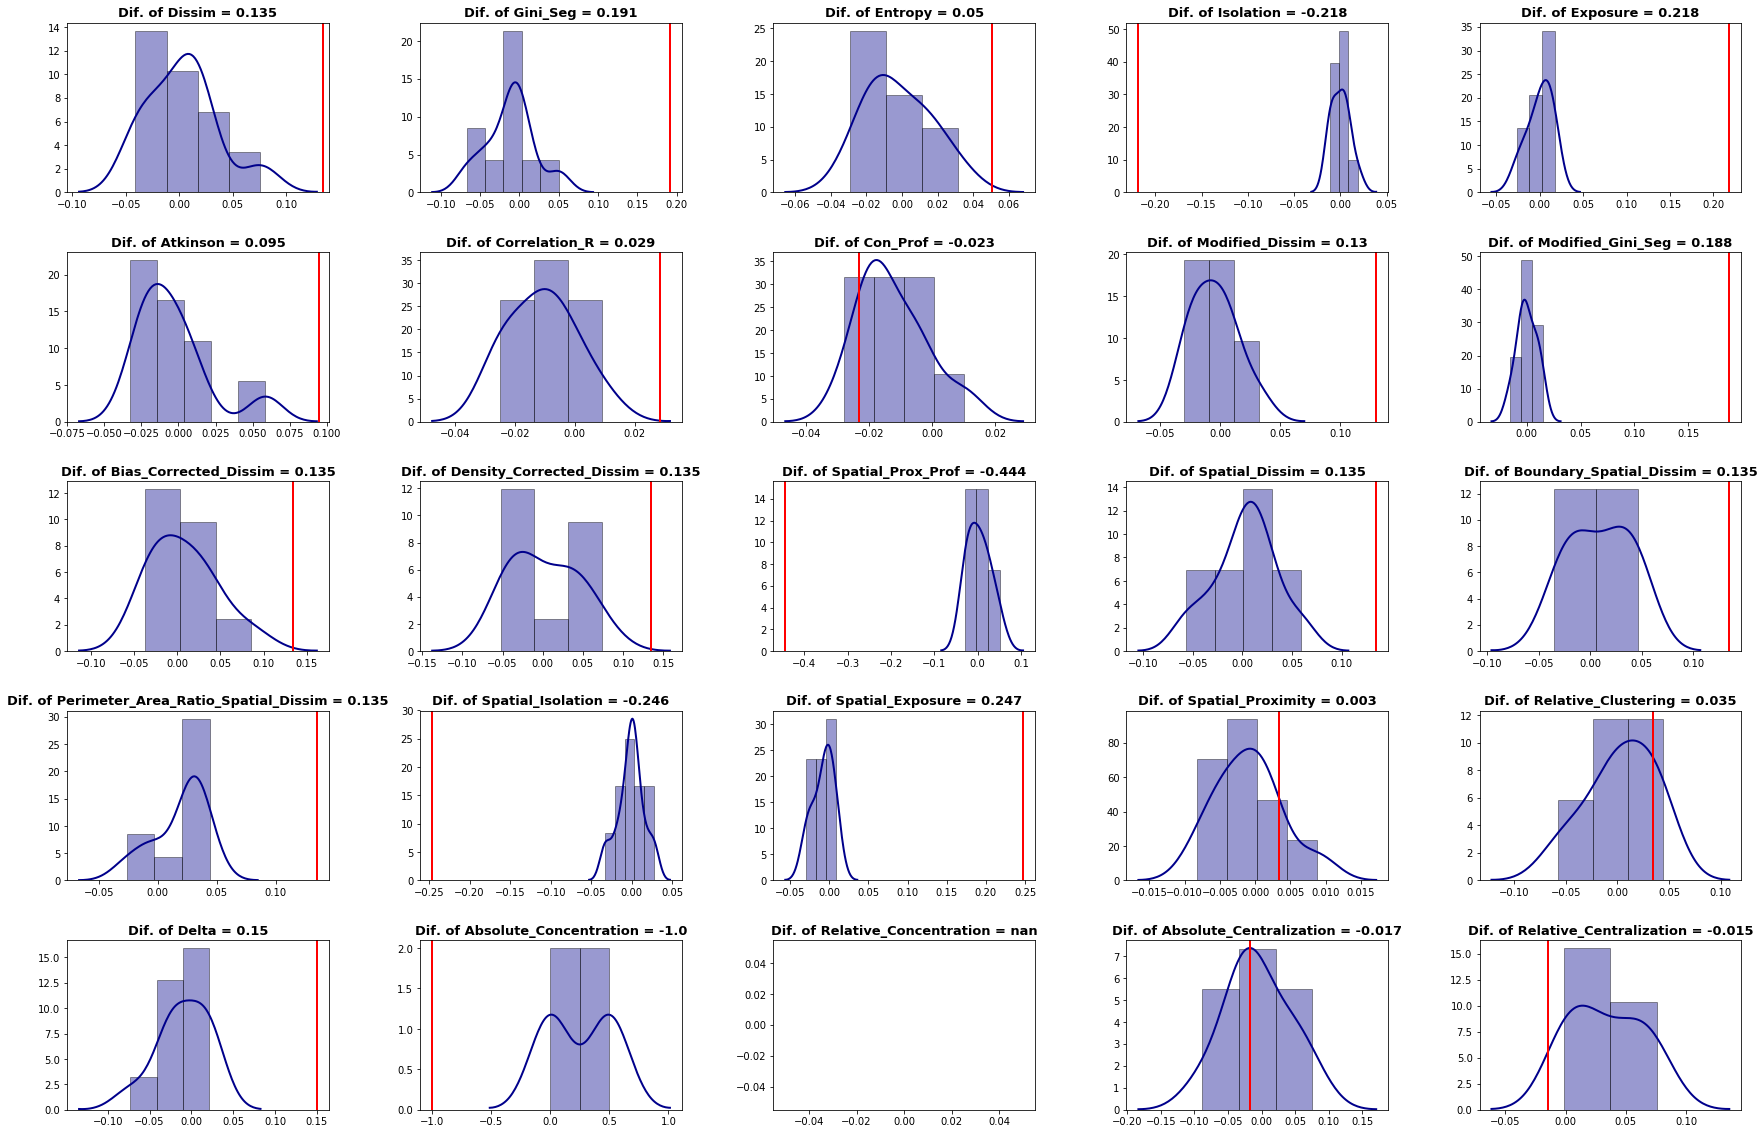

In [52]:
res6 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "pseudo_cumulative")
# [res6[0][i].est_sim for i in range(0, 25)]

# Fourth Scenario: changing the spatial distribution and keeping everything else fixed

In [53]:
# Setup
n = 100000 # Total population

#p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion
p_1 = np.random.beta(a = 5, b = 2, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
p_2 = np.flip(p_1)

lat_10_10_1 = lat_10_10.copy()
lat_10_10_2 = lat_10_10.copy()

lat_10_10_1['total_pop_var'] = int(n * 1/len(lat_10_10_1))
lat_10_10_2['total_pop_var'] = int(n * 1/len(lat_10_10_2))

lat_10_10_1['group_pop_var'] = lat_10_10_1['total_pop_var'] * p_1
lat_10_10_2['group_pop_var'] = lat_10_10_2['total_pop_var'] * p_2

lat_10_10_1.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,254.271088
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,424.280741
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,451.392901
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,272.745444
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,469.805254


In [54]:
lat_10_10_2.head()

,ID,geometry,total_pop_var,group_pop_var
0,0,"POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))",1000,95.604575
1,1,"POLYGON ((0 1, 0 2, 1 2, 1 1, 0 1))",1000,375.373970
2,2,"POLYGON ((0 2, 0 3, 1 3, 1 2, 0 2))",1000,420.615040
3,3,"POLYGON ((0 3, 0 4, 1 4, 1 3, 0 3))",1000,365.930580
4,4,"POLYGON ((0 4, 0 5, 1 5, 1 4, 0 4))",1000,442.204637


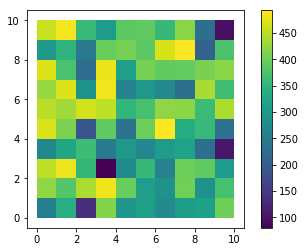

In [55]:
lat_10_10_1.plot(column = 'group_pop_var', legend = True)

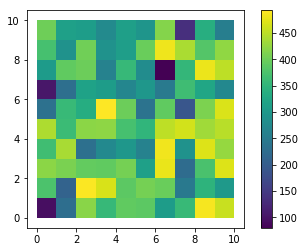

In [56]:
lat_10_10_2.plot(column = 'group_pop_var', legend = True)

In [57]:
lat_10_10_1['group_pop_var'].mean()

351.7824241867737

Dissim Time = 0.17844676971435547
Gini_Seg Time = 0.182281494140625
Entropy Time = 0.22644305229187012
Isolation Time = 0.16247868537902832
Exposure Time = 0.18020009994506836
Atkinson Time = 0.18743562698364258
Correlation_R Time = 0.17582225799560547
Con_Prof Time = 8.714981079101562
Modified_Dissim Time = 23.31366515159607
Modified_Gini_Seg Time = 25.237987995147705
Bias_Corrected_Dissim Time = 22.72124433517456
Density_Corrected_Dissim Time = 25.17606258392334
Spatial_Prox_Prof Time = 4.846827268600464
Spatial_Dissim Time = 0.3148677349090576
Boundary_Spatial_Dissim Time = 1.0508828163146973
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.075857400894165
Spatial_Isolation Time = 0.29380297660827637
Spatial_Exposure Time = 0.2989938259124756
Spatial_Proximity Time = 0.299485445022583
Relative_Clustering Time = 0.29184579849243164
Delta Time = 0.19714045524597168
Absolute_Concentration Time = 0.2803769111633301
Relative_Concentration Time = 0.28127455711364746
Absolute_Centralization Ti

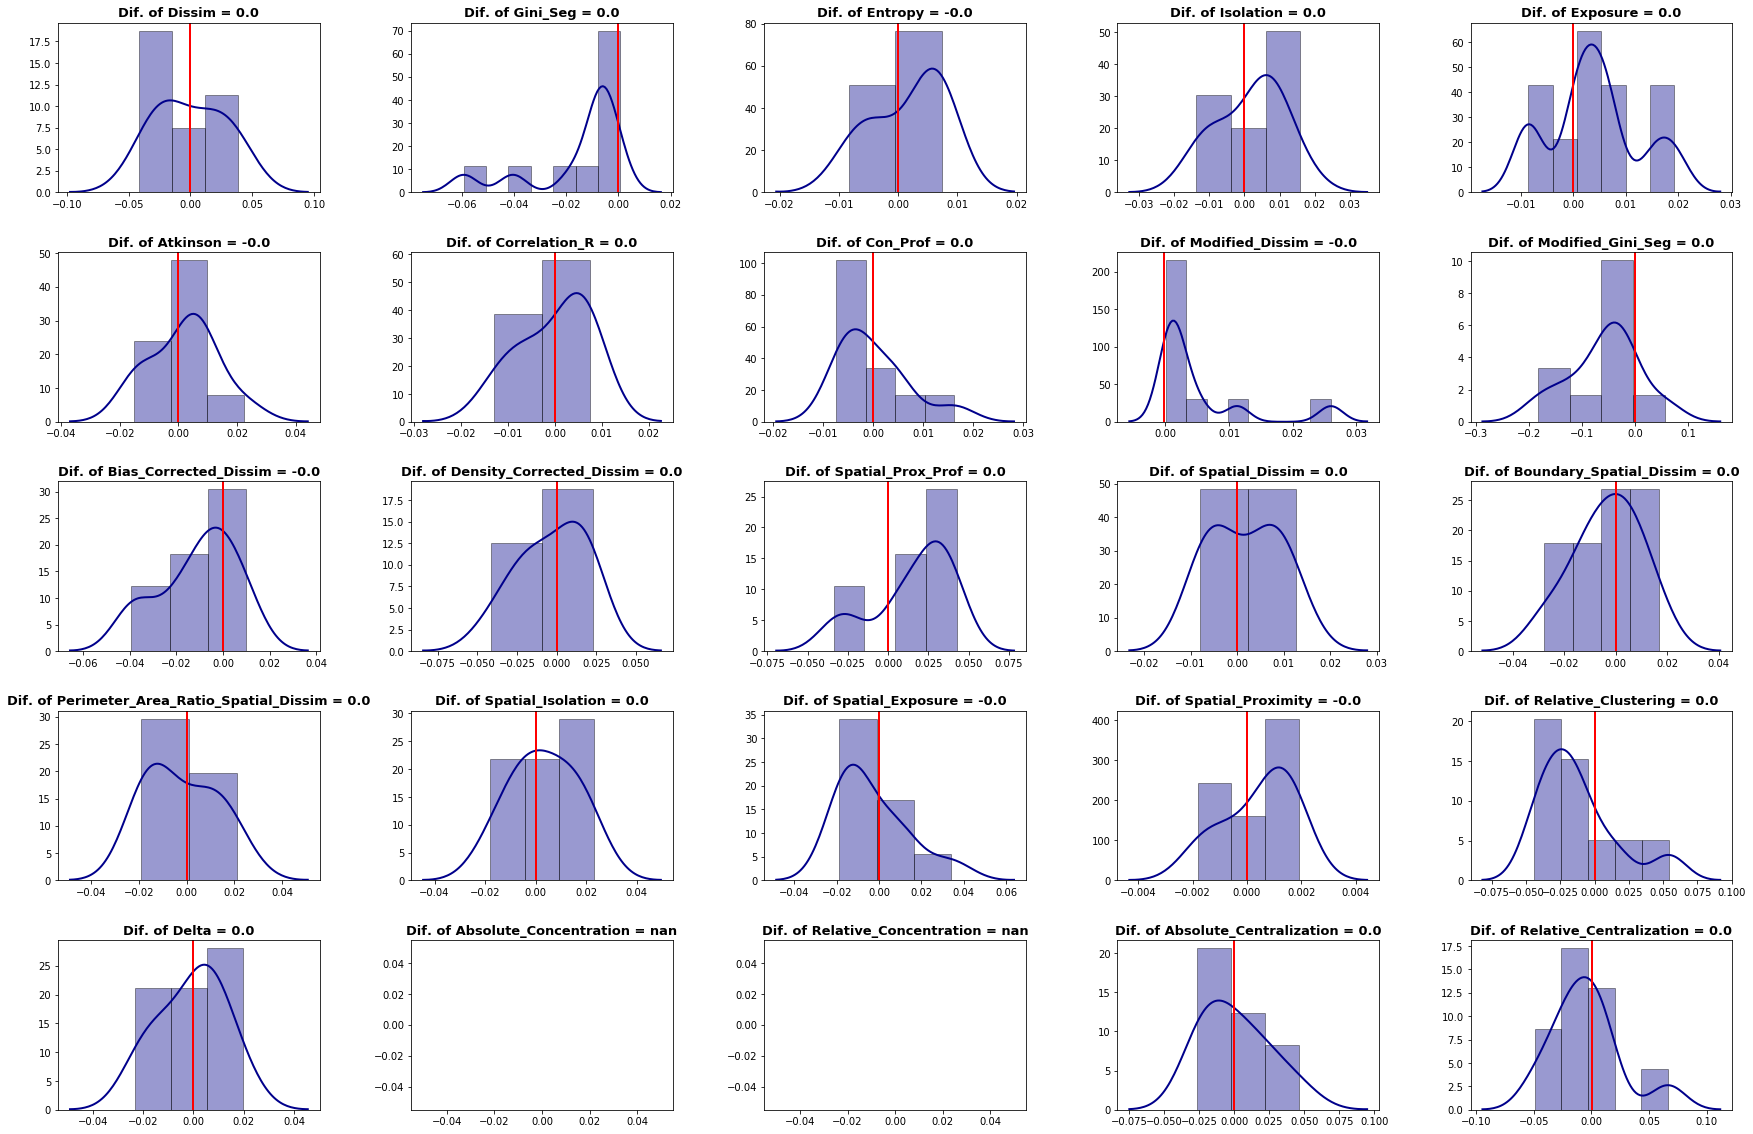

In [58]:
res7 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "random_data")
# [res7[0][i].est_sim for i in range(0, 25)]

Dissim Time = 0.20450806617736816
Gini_Seg Time = 0.1935138702392578
Entropy Time = 0.2174680233001709
Isolation Time = 0.183319091796875
Exposure Time = 0.18169784545898438
Atkinson Time = 0.20350861549377441
Correlation_R Time = 0.18347454071044922
Con_Prof Time = 8.44342041015625
Modified_Dissim Time = 26.670426607131958
Modified_Gini_Seg Time = 24.859199285507202
Bias_Corrected_Dissim Time = 23.11909294128418
Density_Corrected_Dissim Time = 25.378881692886353
Spatial_Prox_Prof Time = 5.006740093231201
Spatial_Dissim Time = 0.3283114433288574
Boundary_Spatial_Dissim Time = 1.0622563362121582
Perimeter_Area_Ratio_Spatial_Dissim Time = 1.1039795875549316
Spatial_Isolation Time = 0.28121209144592285
Spatial_Exposure Time = 0.2961447238922119
Spatial_Proximity Time = 0.29978442192077637
Relative_Clustering Time = 0.28411412239074707
Delta Time = 0.20000362396240234
Absolute_Concentration Time = 0.28930211067199707
Relative_Concentration Time = 0.29750609397888184
Absolute_Centralization

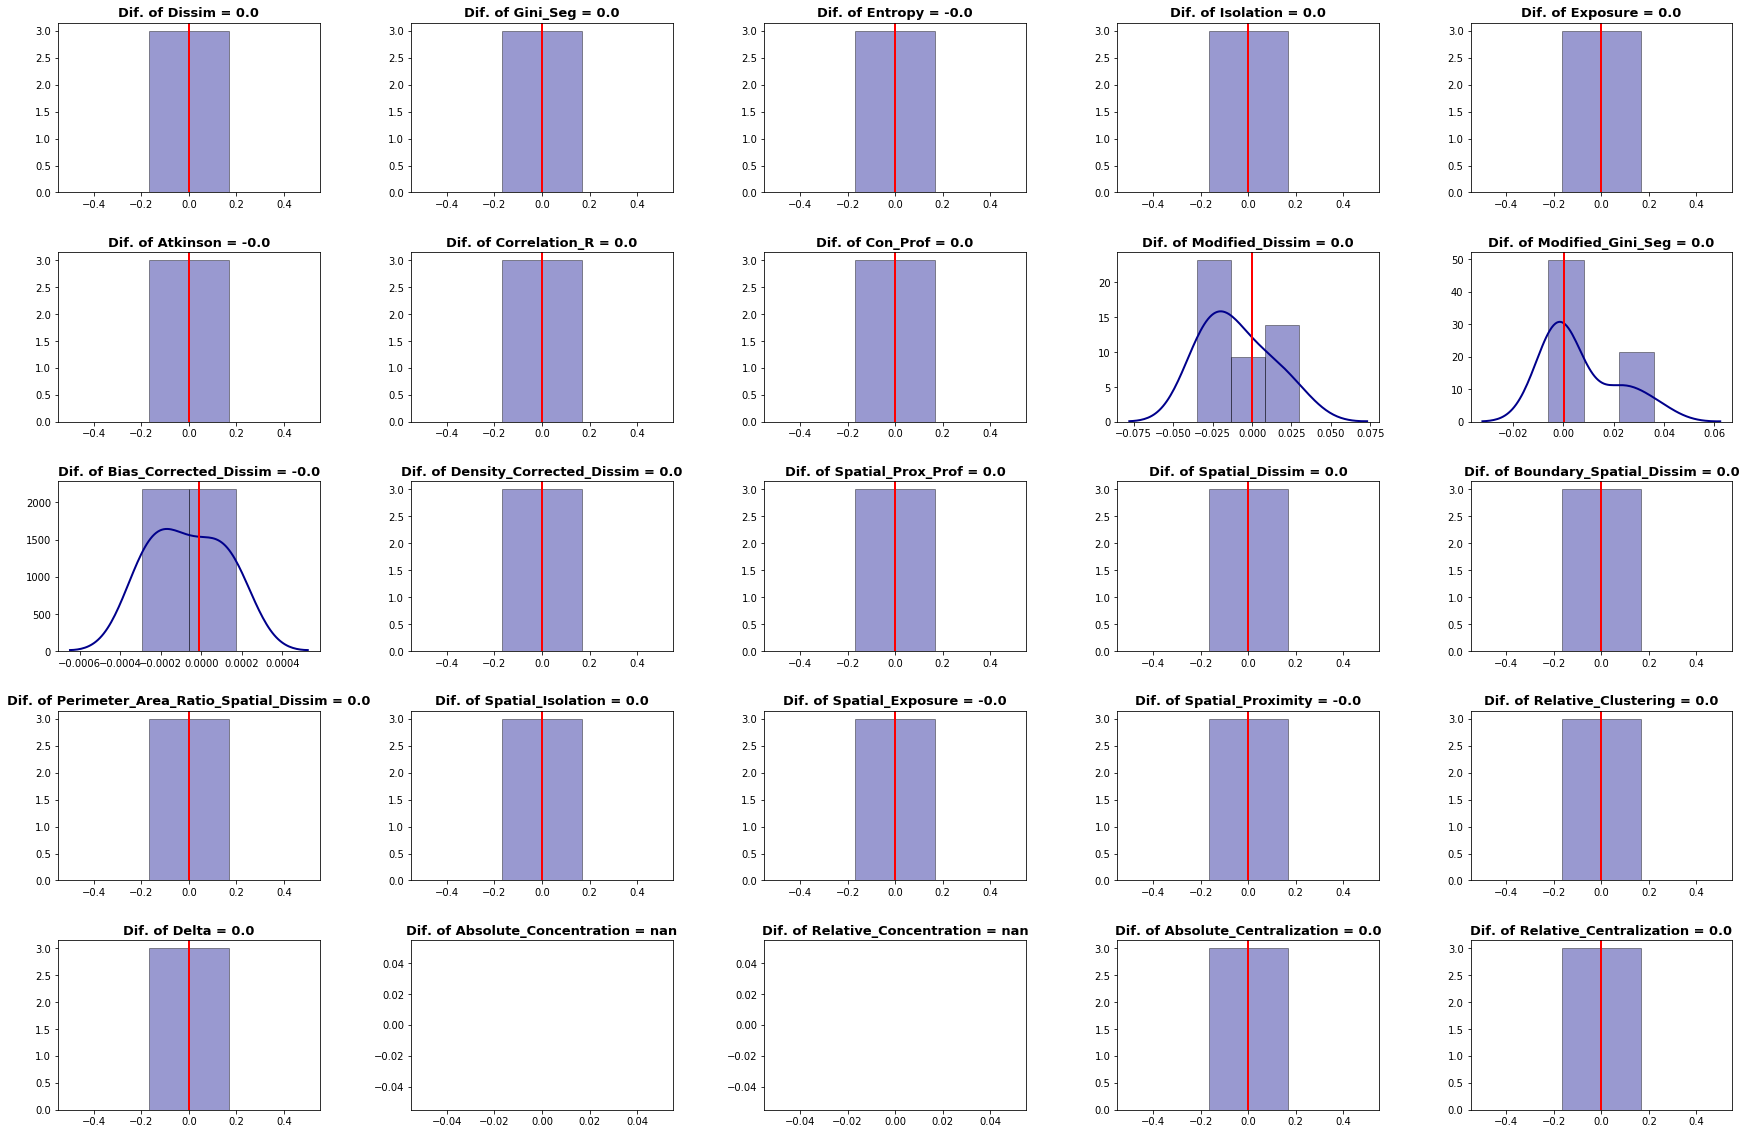

In [59]:
res8 = segregation_comparison_profile(lat_10_10_1, lat_10_10_2, iterations = 10, null_approach = "pseudo_cumulative")
# [res8[0][i].est_sim for i in range(0, 25)]

------
------
------
------
------
------
------
------
------
------
------

# Voronoi polygons for Concentration Indexes construction

It was noticed that regular lattices is not appropriate to make comparative segregation measures since they rely in the order of the spatial units according to the area. Therefore, we need to add unit that have uneven area in order to turn this comparison more feasible. We use Voronoi's diagram inspired by https://github.com/pysal/libpysal/blob/master/notebooks/voronoi.ipynb

In [339]:
from libpysal.cg.voronoi  import voronoi, voronoi_frames

In [340]:
n_points = 100
np.random.seed(1234555)
points = tuple(zip(np.random.normal(size = n_points), np.random.normal(size = n_points)))
results = voronoi(points)

regions, vertices = voronoi(points)
regions_df, points_df = voronoi_frames(points, radius = 0.001)

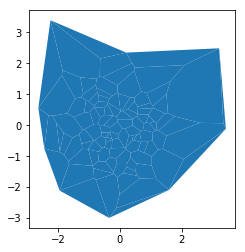

In [341]:
regions_df.plot()

In [342]:
# Function that perform simulation study:
def concentrations_segregation_comparison_profile(gdf_1, gdf_2, iterations, null_approach):
    ACO_1 = Absolute_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    RCO_1 = Relative_Concentration(gdf_1, 'group_pop_var', 'total_pop_var')
    
    ACO_2 = Absolute_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    RCO_2 = Relative_Concentration(gdf_2, 'group_pop_var', 'total_pop_var')
    
    all_measures_1 = (ACO_1, RCO_1)
    all_measures_2 = (ACO_2, RCO_2)
    
    fig = plt.figure(figsize=(30, 20))
    fig.subplots_adjust(hspace = 0.35, wspace = 0.35) # hspace space between lines

    t0 = time.time()

    res_simul = ()

    for i in range(1, len(all_measures_1)+1):

        t0_i = time.time()
        aux = Compare_Segregation(all_measures_1[i-1], 
                                  all_measures_2[i-1], 
                                  null_approach = null_approach, 
                                  iterations = iterations)
        t1_i = time.time()
        print('{} Time = {}'.format(aux._class_name, t1_i - t0_i))
        res_simul += (aux, )

        ax = fig.add_subplot(5, 5, i)
        sns.distplot(aux.est_sim, 
                     color = 'darkblue', 
                     hist_kws={'edgecolor':'black'},
                     kde_kws={'linewidth': 2})
        plt.axvline(aux.est_point_diff, color = 'red', linewidth = 2)
        plt.title('Dif. of {} = {}'.format(aux._class_name, round(aux.est_point_diff, 3)), fontweight = "bold", fontsize = 13)

    t1 = time.time()

    total = t1 - t0
    print('Total Time = {}'.format(total))
    
    return res_simul, total

# First Scenario for Concentration: increase global population

In [343]:
# Setup
n_1 = 100000 # Total population 1
n_2 = 150000 # Total population 2

p = np.random.uniform(0, 1, len(regions_df))  # Random Uniform Minority proportion

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n_1 * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n_2 * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(regions_df_1)))
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.000, size = len(regions_df_2)))

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,774.158313
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,330.875223
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,733.017172
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,333.480231
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,426.916860


In [344]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1500,1161.237470
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1500,496.312835
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1500,1099.525758
3,POLYGON ((1.035848795606021 -1.004696637888146...,1500,500.220347
4,POLYGON ((-2.630499038878759 0.557425540744831...,1500,640.375289


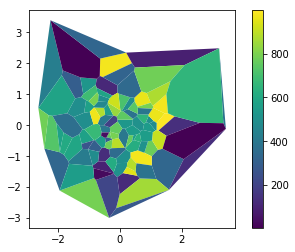

In [345]:
regions_df_1.plot(column = 'group_pop_var', legend = True)

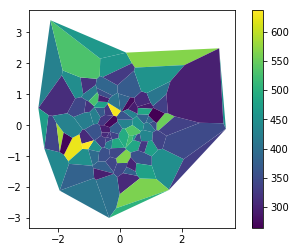

In [378]:
regions_df_2.plot(column = 'group_pop_var', legend = True)

Absolute_Concentration Time = 0.45281195640563965
Relative_Concentration Time = 0.4507937431335449
Total Time = 0.928480863571167


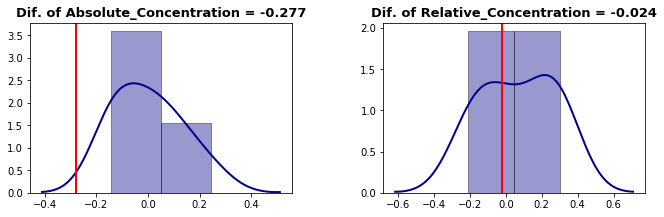

In [384]:
conc_res1 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 10, null_approach = "random_data")
# [conc_res1[0][i].est_sim for i in range(0, 2)]

Absolute_Concentration Time = 0.43583130836486816
Relative_Concentration Time = 0.43186283111572266
Total Time = 0.8926100730895996


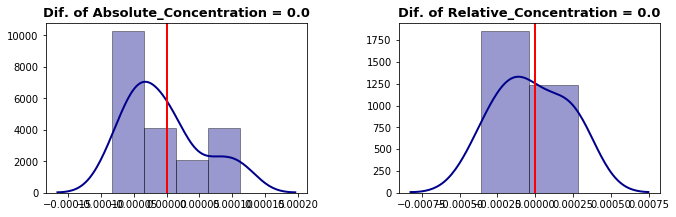

In [348]:
conc_res2 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 10, null_approach = "pseudo_cumulative")
# [conc_res2[0][i].est_sim for i in range(0, 2)]

# Second Scenario for Concentration: change spatial topology

In [349]:
n_points2 = 144
np.random.seed(1234557776) # Changed the seed!
points2 = tuple(zip(np.random.normal(size = n_points2), np.random.normal(size = n_points2)))
results2 = voronoi(points2)

regions2, vertices2 = voronoi(points2)
regions_df2, points_df2 = voronoi_frames(points2, radius = 0.001)

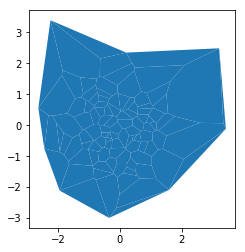

In [350]:
regions_df.plot()

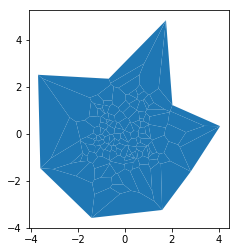

In [352]:
regions_df2.plot()

In [358]:
# Setup
n = 100000 # Total population

p = 0.3  # Same global minority proportion
#p = np.linspace(0, 1, len(lat_10_10))  # Gradient Minority proportion
#p = np.random.uniform(0, 1, len(lat_10_10))  # Random Uniform Minority proportion

regions_df_100 = regions_df.copy()
regions_df_144 = regions_df2.copy()

regions_df_100['total_pop_var'] = int(n * 1/len(regions_df_100))
regions_df_144['total_pop_var'] = int(n * 1/len(regions_df_144))

regions_df_100['group_pop_var'] = regions_df_100['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(regions_df_100)))
regions_df_144['group_pop_var'] = regions_df_144['total_pop_var'] * (p + np.random.normal(loc = 0.0, scale = 0.0001, size = len(regions_df_144)))

regions_df_100.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,299.948636
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,300.042198
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,300.079069
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,300.048555
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,300.032568


In [359]:
regions_df_144.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((1.594818548654328 -3.250906495908954...,694,208.126968
1,"POLYGON ((0.6391708453313651 2.09367361909454,...",694,208.200746
2,POLYGON ((0.5037366572615166 -0.64633004129613...,694,208.166375
3,POLYGON ((-1.493598050901387 1.531286068792384...,694,208.232372
4,POLYGON ((-1.896579349124898 -1.18693469064672...,694,208.099963


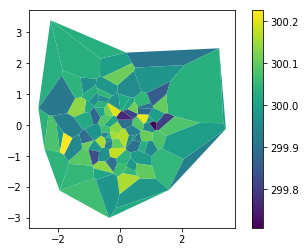

In [360]:
regions_df_100.plot(column='group_pop_var', legend = True)

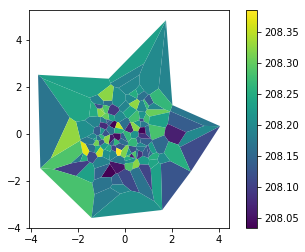

In [361]:
regions_df_144.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 0.47777628898620605
Relative_Concentration Time = 0.45680928230285645
Total Time = 0.9594647884368896


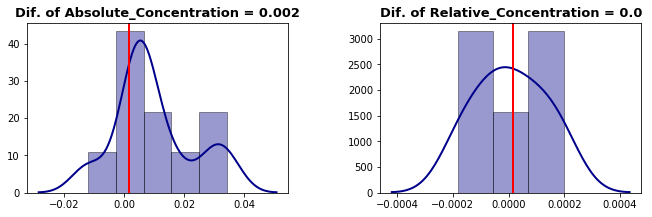

In [367]:
conc_res3 = concentrations_segregation_comparison_profile(regions_df_100, regions_df_144, iterations = 10, null_approach = "random_data")
# [conc_res3[0][i].est_sim for i in range(0, 2)]

Absolute_Concentration Time = 0.4537668228149414
Relative_Concentration Time = 0.44785547256469727
Total Time = 0.9264719486236572


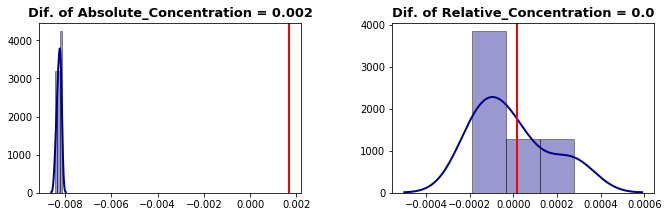

In [368]:
conc_res4 = concentrations_segregation_comparison_profile(regions_df_100, regions_df_144, iterations = 10, null_approach = "pseudo_cumulative")
# [conc_res4[0][i].est_sim for i in range(0, 2)]

# Third Scenario: composition increased

In [369]:
# Setup
n = 100000 # Total population

p_1 = np.random.beta(a = 2, b = 5, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * p_1
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * (p_1 + 0.25) # p_2

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,224.386257
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,188.076224
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,90.921571
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,197.841316
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,175.863552


In [370]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,474.386257
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,438.076224
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,340.921571
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,447.841316
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,425.863552


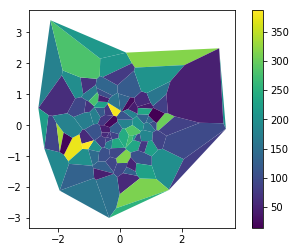

In [371]:
regions_df_1.plot(column='group_pop_var', legend = True)

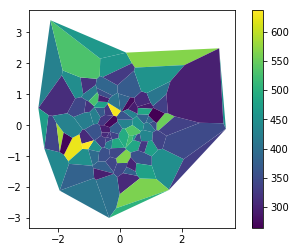

In [372]:
regions_df_2.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 2.0943973064422607
Relative_Concentration Time = 2.0854527950286865
Total Time = 4.2087109088897705


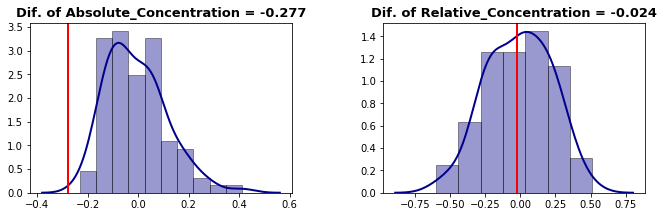

In [377]:
conc_res5 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 100, null_approach = "random_data")
# [conc_res5[0][i].est_sim for i in range(0, 2)]

Absolute_Concentration Time = 2.1113288402557373
Relative_Concentration Time = 2.1412744522094727
Total Time = 4.282553195953369


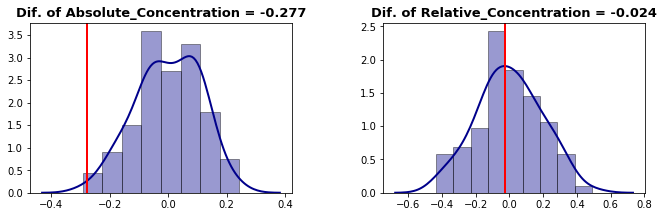

In [376]:
conc_res6 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 100, null_approach = "pseudo_cumulative")
# [conc_res6[0][i].est_sim for i in range(0, 2)]

# Fourth Scenario: changing spatial distribution

In [385]:
# Setup
n = 100000 # Total population

p_1 = np.random.beta(a = 5, b = 2, size = 100) / 2 # Divide by 2 to force the generated numbers lie between 0 and 0.5
p_2 = np.flip(p_1)

regions_df_1 = regions_df.copy()
regions_df_2 = regions_df.copy()

regions_df_1['total_pop_var'] = int(n * 1/len(regions_df_1))
regions_df_2['total_pop_var'] = int(n * 1/len(regions_df_2))

regions_df_1['group_pop_var'] = regions_df_1['total_pop_var'] * p_1
regions_df_2['group_pop_var'] = regions_df_2['total_pop_var'] * p_2

regions_df_1.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,218.737497
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,136.934081
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,440.343036
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,306.170949
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,394.354451


In [386]:
regions_df_2.head()

,geometry,total_pop_var,group_pop_var
0,POLYGON ((0.7965790587692183 -0.88876602650889...,1000,367.483368
1,POLYGON ((-1.940855430921739 -2.11133397662081...,1000,392.684668
2,POLYGON ((-2.17293218421855 0.3039966352757291...,1000,441.549756
3,POLYGON ((1.035848795606021 -1.004696637888146...,1000,293.758211
4,POLYGON ((-2.630499038878759 0.557425540744831...,1000,287.553436


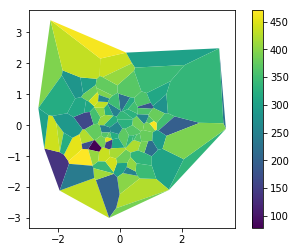

In [387]:
regions_df_1.plot(column='group_pop_var', legend = True)

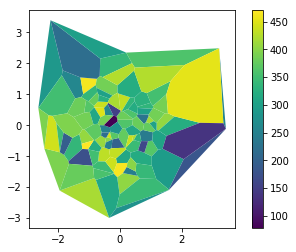

In [388]:
regions_df_2.plot(column='group_pop_var', legend = True)

Absolute_Concentration Time = 2.1911065578460693
Relative_Concentration Time = 2.1163737773895264
Total Time = 4.339392185211182


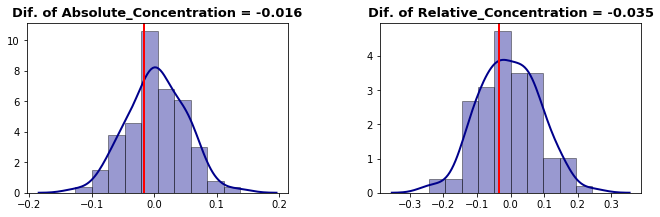

In [389]:
conc_res7 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 100, null_approach = "random_data")
# [conc_res7[0][i].est_sim for i in range(0, 2)]

Absolute_Concentration Time = 2.092423439025879
Relative_Concentration Time = 2.0245847702026367
Total Time = 4.146908521652222


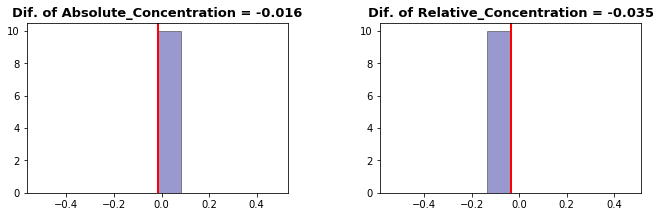

In [390]:
conc_res8 = concentrations_segregation_comparison_profile(regions_df_1, regions_df_2, iterations = 100, null_approach = "pseudo_cumulative")
# [conc_res8[0][i].est_sim for i in range(0, 2)]